# KNN | full Case-study (Social Media Advertising)

### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline

### Importing Dataset & Extracting Feature

In [2]:
ads = pd.read_csv('social-network-ads.csv')

In [3]:
ads.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
X = ads.iloc[:, 0:2].values
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [5]:
y = ads.iloc[:, 2].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

### Data Splitting & Preprocessing

In [6]:
from  sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
X_train

array([[    58,  95000],
       [    25,  22000],
       [    41,  59000],
       [    28,  89000],
       [    42,  80000],
       [    42, 108000],
       [    46,  96000],
       [    47, 113000],
       [    33,  28000],
       [    19,  25000],
       [    49,  89000],
       [    31,  15000],
       [    30,  79000],
       [    48, 141000],
       [    32, 117000],
       [    37,  71000],
       [    18,  86000],
       [    42,  79000],
       [    27,  84000],
       [    40,  65000],
       [    57,  74000],
       [    26,  15000],
       [    26,  80000],
       [    29,  43000],
       [    33, 149000],
       [    39,  42000],
       [    54, 104000],
       [    36,  33000],
       [    46,  32000],
       [    40, 142000],
       [    37,  62000],
       [    29, 148000],
       [    37,  57000],
       [    35,  50000],
       [    42,  53000],
       [    35,  38000],
       [    41,  30000],
       [    40,  72000],
       [    26,  15000],
       [    31,  68000],


In [9]:
X_train.shape

(268, 2)

In [10]:
X_test

array([[    46,  22000],
       [    59,  88000],
       [    28,  44000],
       [    48,  96000],
       [    29,  28000],
       [    30,  62000],
       [    47, 107000],
       [    29,  83000],
       [    40,  75000],
       [    42,  65000],
       [    35,  65000],
       [    53,  34000],
       [    23,  48000],
       [    20,  23000],
       [    30,  87000],
       [    35, 108000],
       [    52,  38000],
       [    46,  74000],
       [    39,  42000],
       [    56,  60000],
       [    22,  27000],
       [    29,  80000],
       [    47,  23000],
       [    59,  76000],
       [    19,  19000],
       [    51,  23000],
       [    42,  80000],
       [    37,  53000],
       [    55, 125000],
       [    19,  21000],
       [    46,  41000],
       [    19,  70000],
       [    36, 144000],
       [    28,  79000],
       [    40, 107000],
       [    35,  75000],
       [    37,  55000],
       [    38,  65000],
       [    26,  30000],
       [    18,  68000],


In [11]:
X_test.shape

(132, 2)

In [12]:
y_train.shape

(268,)

In [13]:
y_test.shape

(132,)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()

In [16]:
X_train = sc.fit_transform(X_train)

In [17]:
X_test = sc.fit_transform(X_test)

### Model Training & Predicting 

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [20]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [24]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

### Model Evaluation

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [27]:
confusion_matrix(y_test, y_pred)

array([[77,  3],
       [ 4, 48]], dtype=int64)

In [28]:
print ("Accuracy {0: .2f}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy  94.70%


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96        80
           1       0.94      0.92      0.93        52

    accuracy                           0.95       132
   macro avg       0.95      0.94      0.94       132
weighted avg       0.95      0.95      0.95       132



### Choosing Best Valus of "K"

In [47]:
test_error_rate = []

for i in range(1, 30):
    model = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2)
    model.fit(X_train, y_train)
    y_pred_err = model.predict(X_test)

    test_error = 1 - accuracy_score(y_test, y_pred_err)
    test_error_rate.append(test_error)


In [48]:
test_error_rate

[0.13636363636363635,
 0.16666666666666663,
 0.09090909090909094,
 0.09848484848484851,
 0.05303030303030298,
 0.06818181818181823,
 0.045454545454545414,
 0.05303030303030298,
 0.037878787878787845,
 0.037878787878787845,
 0.037878787878787845,
 0.06060606060606055,
 0.05303030303030298,
 0.06060606060606055,
 0.045454545454545414,
 0.06060606060606055,
 0.06818181818181823,
 0.06818181818181823,
 0.06818181818181823,
 0.06818181818181823,
 0.06818181818181823,
 0.06060606060606055,
 0.06060606060606055,
 0.06060606060606055,
 0.06060606060606055,
 0.06818181818181823,
 0.06818181818181823,
 0.0757575757575758,
 0.0757575757575758]

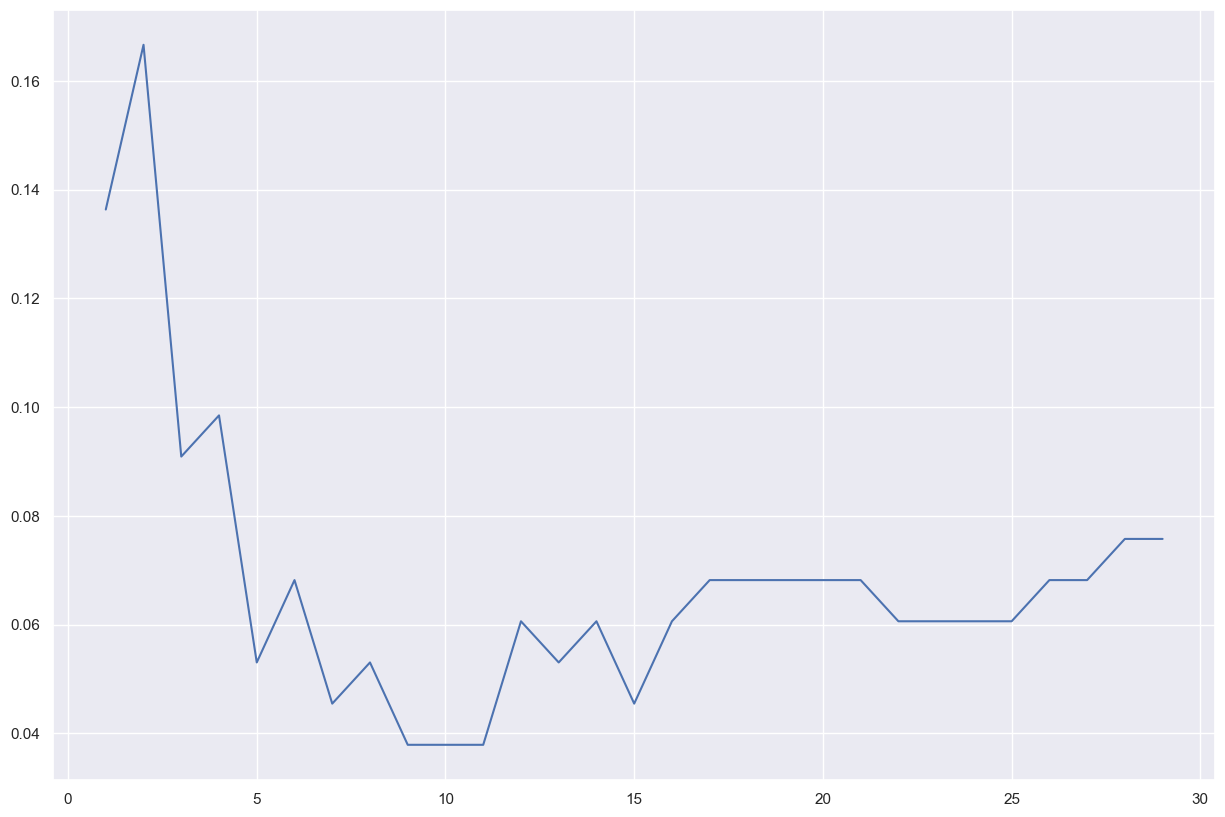

In [49]:
plt.figure(figsize=(15,10))
plt.plot(range(1,30), test_error_rate)

# So "9" is The Best Value of K 

In [51]:
clf = KNeighborsClassifier(n_neighbors=9, metric='minkowski', p=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print ("Accuracy {0: .2f}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy  96.21%
